<a href="https://colab.research.google.com/github/LFCZizou/Petroleum-Data-Visualization-/blob/main/ProjectWorkbook_ipynb_Zinedine_Asghar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code to mount your Google Drive
The two lines of code below help you mount the Project Folder, which you have downloaded, unzipped, and uploaded to your Google Drive.

After running the two lines of code below, you should click on `drive` then `MyDrive`, then click on the three vertical dots on the right of your project folder (eg. `ProjectFolder_Femi`), and select `Open`.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Project Starter Code

## Instructions

**All project questions are listed here, but I provide some useful code before repeating the questions right before an empty code cell where you should type your code for each question.**


1.     Using the default code given below, write a Python code that:

  (a) loads the DCAParams.json file into a dictionary, parses the dictionary into a DataFrame, and sorts the DataFrame by wellID.

  (b) loads the attached ProdData.json file into a dictionary, parses the dictionary into a DataFrame, and sorts the DataFrame by wellID and month.
  
  (c) loops through all 17 well production rates in the JSON file and:
  
      (i) calculates and plots the rates and cumulative production versus time for each of the 17 wells, using the decline curve parameters in the JSON file. The rate should be on the primary y-axis, while the cumulative production should be on the secondary y-axis.

      (ii) plots the historical rate and cumulative production versus time for each of the 17 wells. The rate should be on the primary y-axis, while the cumulative production should be on the secondary y-axis.

2.     For all remaining questions in Lab 12, wells 1, 3, 4, 7, 8, 9, 13, and 17 are gas wells, while the others are oil wells. Write a Python code to create a stacked plot of the historical field gas production rate. Each gas well’s contribution should be shown in the stacked plot.

3.     Write a Python code to create a stacked plot of the historical field oil production rate. Each oil well’s contribution should be shown in the stacked plot.

4.     Write a Python code to create a stacked bar plot of historical field cumulative gas production for the first six months. Each gas well’s contribution should be shown in the stacked bar graph.

5.     Write a Python code to create a stacked bar plot of historical field cumulative oil production for the first six months. Each oil well’s contribution should be shown in the stacked bar graph.

6.     Load the well log data for wells 15_9-F-4, 15_9-F-1B, and 15_9-F-14. Plot the following well logs against depth for each of the three wells, using a well log track for each variable:

  (a)     bulk density (rhob) log

  (b)     DT (interval transit time for P-wave or inverse of primary wave velocity) log

  (c)     DTS (interval transit time for S-wave or inverse of shear wave velocity) log

  (d)     GR (Gamma Ray) log

  (e)     NPHI (neutron porosity) log

  (f)      Caliper (CALI) log

7. (a) Write a Python code to load the Volve daily production data from the attached "VolveData.json" file.

  (b) Convert the loaded data into a Pandas DataFrame and visualize the Pandas DataFrame. Print out the column headers and observe that the column named "NPD_WELL_BORE_CODE" contains the wellbore codes; the column named "NPD_WELL_BORE_NAME" contains the well names; the columns named "AVG_DOWNHOLE_PRESSURE" and "AVG_DOWNHOLE_TEMPERATURE" contain the average bottomhole pressure and temperature, respectively; the column named "DP_CHOKE_SIZE" contains the choke sizes; the columns named "BORE_OIL_VOL", "BORE_GAS_VOL", and "BORE_WAT_VOL" contain the daily oil, gas and water production rates, respectively; the column named "BORE_WI_VOL" contains the daily water injection rates; while the column named "FLOW_KIND" tells you whether the well is a production well or an injection well.

  (c) Plot the choke size data on the secondary y-axis and oil rate on the primary y-axis for each of the wells in the Volve data.

  (d) Look at all the plots generated and observe that the oil rate is nearly zero for the injection wells. You can see which wells are injection wells from "FLOW_KIND" column of the DataFrame. Modify your solution to (c) above to plot the daily water injection rate instead of daily oil production rate for the injection wells. Use a different marker color for the injection rates so that it is clearly different from the production wells.

## Instructions
Study the two code cells given below, then attempt question 1.

In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path2file = '/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/'
dca_filepath = path2file + 'DCAparams.json'
prodData_filepath = path2file + 'ProdData.json'

with open(dca_filepath, 'r') as f:
  dcaParams_dict = json.load(f)

dcaParamsDF = pd.DataFrame(dcaParams_dict)
dcaParamsDF = dcaParamsDF.sort_values('well ID').reset_index(drop=True)
dcaParamsDF.head()

with open(prodData_filepath, 'r') as f:
  prodData_dict = json.load(f)

prodDataDF = pd.DataFrame(prodData_dict)
prodDataDF = prodDataDF.sort_values(['well ID', 'month']).reset_index(drop=True)
prodDataDF.head(26)



,month,rate,cumulative,well ID
0,1,72915.839919,72915.839919,1
1,2,81232.077660,154147.917579,1
2,3,53621.280524,207769.198102,1
3,4,56980.438056,264749.636158,1
4,5,58723.007017,323472.643175,1
5,6,51680.504953,375153.148128,1
6,7,38565.052461,413718.200589,1
7,8,39873.488799,453591.689388,1
8,9,41257.395656,494849.085044,1
9,10,46634.648938,541483.733982,1


## Plot model and historical cumulative production for only well #1

This means that you need to first use the decline curve parameters in `DCAparams.json` to calculate the cumulative production. Then you plot this and the historical cumulative production provided in `ProdData.json`

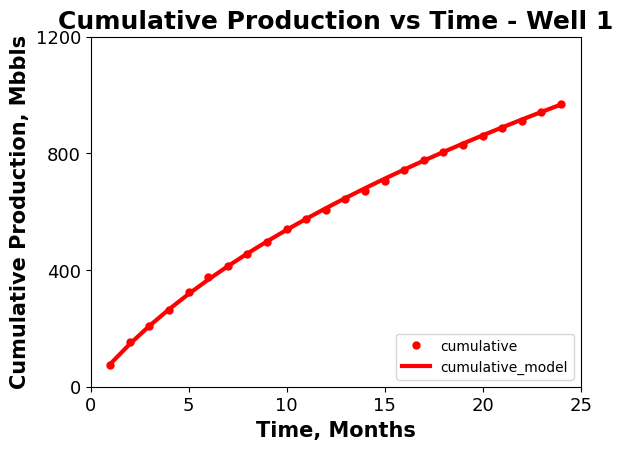

In [3]:
#----------------------------------------------------------------------------
#                            B. FORECAST RATES AND CUM. PROD.
#----------------------------------------------------------------------------
######################Visualization for well 1 only######################
dcaParamsDF.head()
wellID = 1
# get qi, Di and b of well #1


dcaParamsDF_well_i = dcaParamsDF[dcaParamsDF['well ID'] == wellID].copy()
dcaParamsDF_well_i

qi = dcaParamsDF_well_i['Qi'].iloc[0]   # qi = dcaParamsDF_well_i.iloc[0, 0]
Di = dcaParamsDF_well_i['di'].iloc[0]   # Di = dcaParamsDF_well_i.iloc[0, 1]
b  = dcaParamsDF_well_i['b'].iloc[0]     # b  = dcaParamsDF_well_i.iloc[0, 2]

# get actual well production data of the  well
prodDataDF_well_i = prodDataDF[prodDataDF['well ID'] == wellID].copy()
prodDataDF_well_i

# calculate well flow rate and cumulative production
dfLength = 24   # this is the number of rows in the production data
t = np.arange(1,dfLength+1)
Di = Di/12   # convert Di from %/year to %/month
if b>0:
    # Hyperbolic decline model
    q = 30.4375*qi/((1 + b*Di*t)**(1/b)) #30.4375 = 365.125/12. This is to get rates in bbls/month
    Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b))) # Also scale Np bcos t is in months
else:
    # Exponential decline model
    q = qi*np.exp(-Di*t)    # Not scaled yet so that it doesn't mess up our estimation of Np
    Np = 30.4375*(qi-q)/Di
    q = 30.4375*q           # Now scale q so it becomes in units of bbls/month

# Store the model estimates of rate and cumulative production in the "ratesDF" dataframe
prodDataDF_well_i['rate_model'] = q
prodDataDF_well_i['cumulative_model'] = Np


#----------------------------------------------------------------------------
#                            C. PRIMARY PLOT
#----------------------------------------------------------------------------
# Create Production Plots
# custom Plot parameters
titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

currFig = plt.figure(figsize=(7,5), dpi=100)

# Add set of axes to figure
axes = currFig.add_axes([0.15, 0.15, 0.7, 0.7])# left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative']/1000,
          color="red", ls='None', marker='o', markersize=5,label = 'cumulative' )

axes.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative_model']/1000,
          color="red", lw=3, ls='-',label = 'cumulative_model')

axes.legend(loc=4)
axes.set_title('Cumulative Production vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
axes.set_xlabel('Time, Months', fontsize=axisLabelFontSize, fontweight='bold') # Notice the use of set_ to begin methods
axes.set_ylabel('Cumulative Production, Mbbls', fontsize=axisLabelFontSize, fontweight='bold')
#axes.set_ylim([0, 1200])
axes.set_xlim([0, 25])
xticks = range(0,30,5) #np.linspace(0,4000,5)
axes.set_xticks(xticks)
axes.set_xticklabels(xticks, fontsize=axisNumFontSize);

yticks = [0, 400, 800, 1200]
axes.set_yticks(yticks)
axes.set_yticklabels(yticks, fontsize=axisNumFontSize);

currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)


## How to plot rates and cumulative production on `primary y` and `secondary y` axes, respectively?

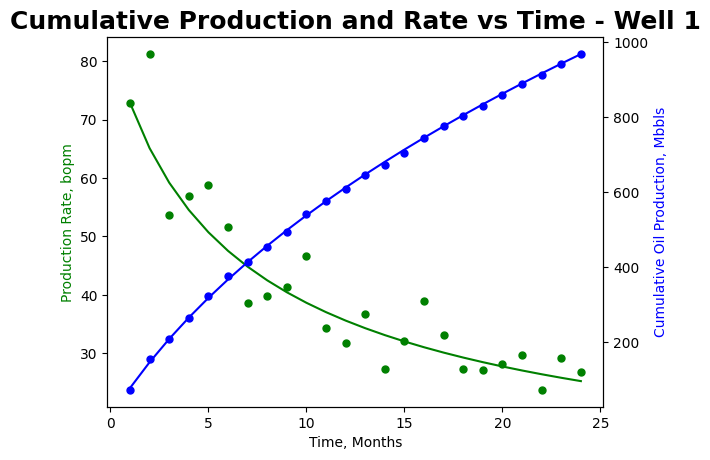

<Figure size 700x500 with 0 Axes>

In [4]:
#----------------------------------------------------------------------------
#                            D. PRIMARY AND SECONDARY Y AXIS
#----------------------------------------------------------------------------
# Create Production Plots
# custom Plot parameters
titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(prodDataDF_well_i['month'], prodDataDF_well_i['rate']/1000, color="green", ls='None', marker='o', markersize=5,label = 'rate')
ax1.plot(prodDataDF_well_i['month'], prodDataDF_well_i['rate_model']/1000, color="green", ls='-',label = 'rate_model')

ax2.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative']/1000, color="blue", ls='None', marker='o', markersize=5,label = 'cumulative')
ax2.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative_model']/1000, color="blue", ls='-', label = 'cumulative_model')

ax1.set_xlabel('Time, Months')
ax1.set_ylabel('Production Rate, bopm', color='g')
ax2.set_ylabel('Cumulative Oil Production, Mbbls', color='b')

ax2.set_title('Cumulative Production and Rate vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
currFig = plt.figure(figsize=(7,5), dpi=100)
currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)



1. Using the default code given below, write a Python code that:

  (a) loads the DCAParams.json file into a dictionary, parses the dictionary into a DataFrame, and sorts the DataFrame by wellID.

  (b) loads the attached ProdData.json file into a dictionary, parses the dictionary into a DataFrame, and sorts the DataFrame by wellID and month.
  
  (c) loops through all 17 well production rates in the JSON file and:
  
      (i) calculates and plots the rates and cumulative production versus time for each of the 17 wells, using the decline curve parameters in the JSON file. The rate should be on the primary y-axis, while the cumulative production should be on the secondary y-axis.

      (ii) add the plots of the historical rate and cumulative production versus time for each of the 17 wells. The rate should be on the primary y-axis, while the cumulative production should be on the secondary y-axis.

/tmp/ipython-input-2239687301.py:61: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots()


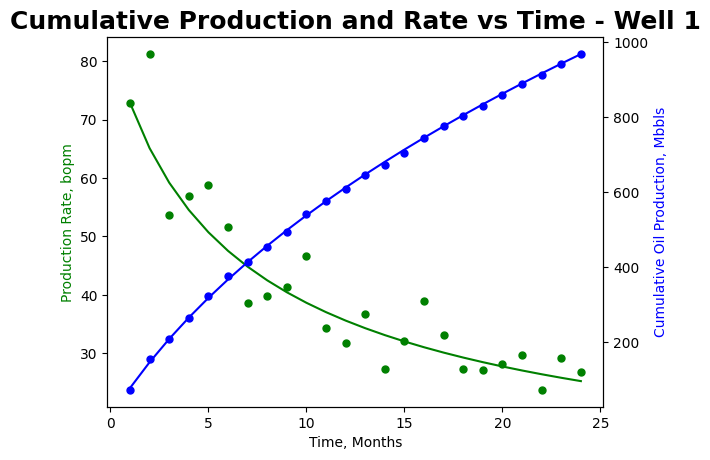

<Figure size 700x500 with 0 Axes>

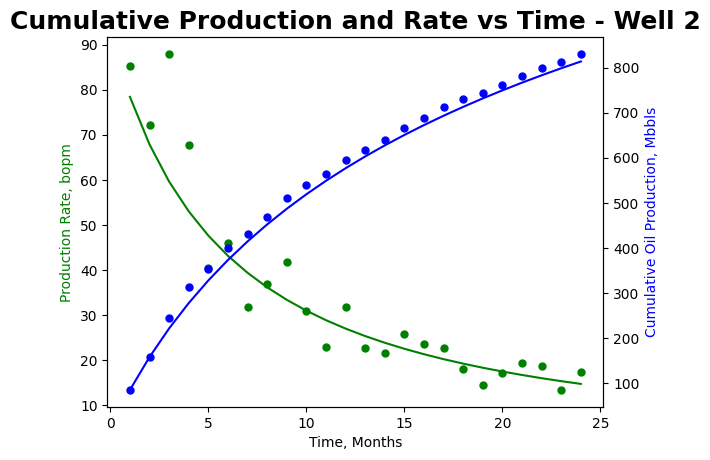

<Figure size 700x500 with 0 Axes>

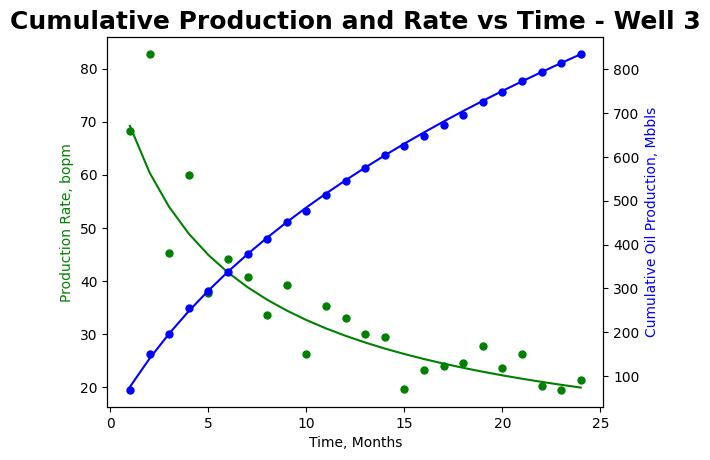

<Figure size 700x500 with 0 Axes>

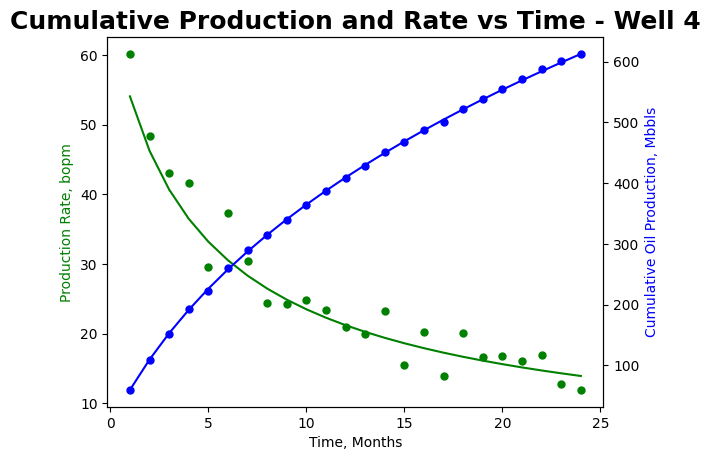

<Figure size 700x500 with 0 Axes>

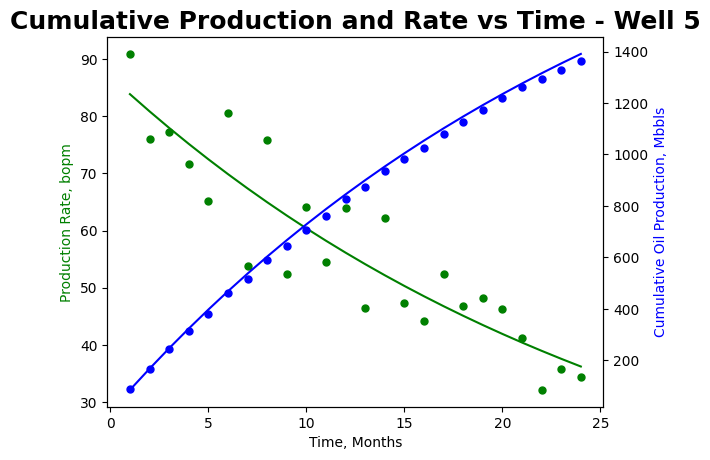

<Figure size 700x500 with 0 Axes>

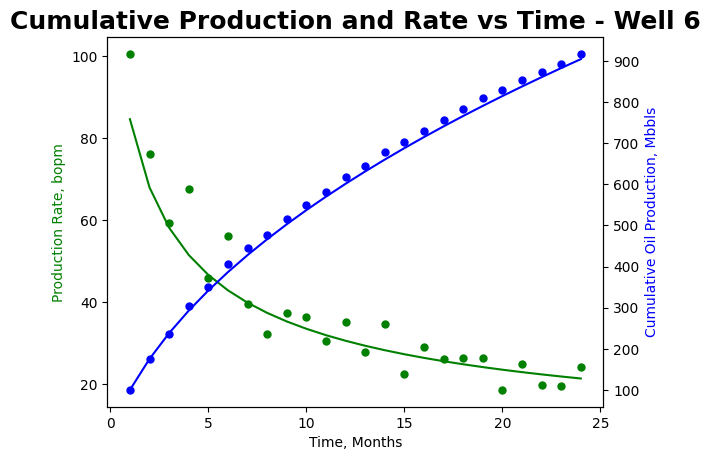

<Figure size 700x500 with 0 Axes>

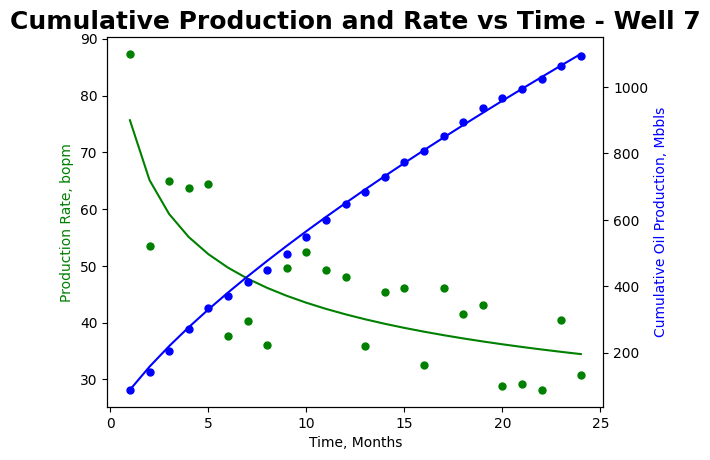

<Figure size 700x500 with 0 Axes>

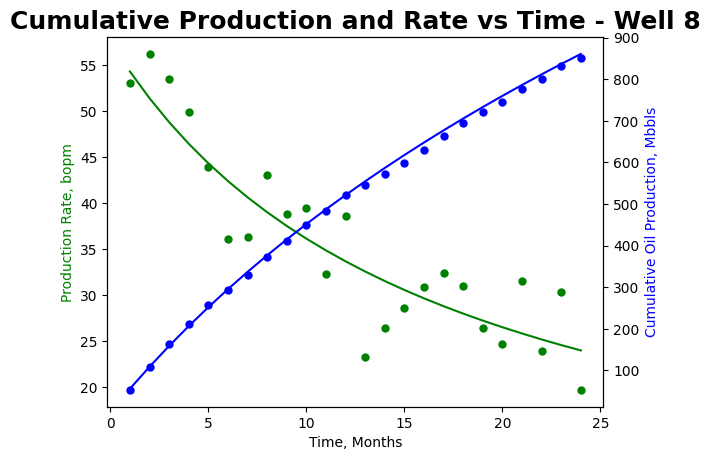

<Figure size 700x500 with 0 Axes>

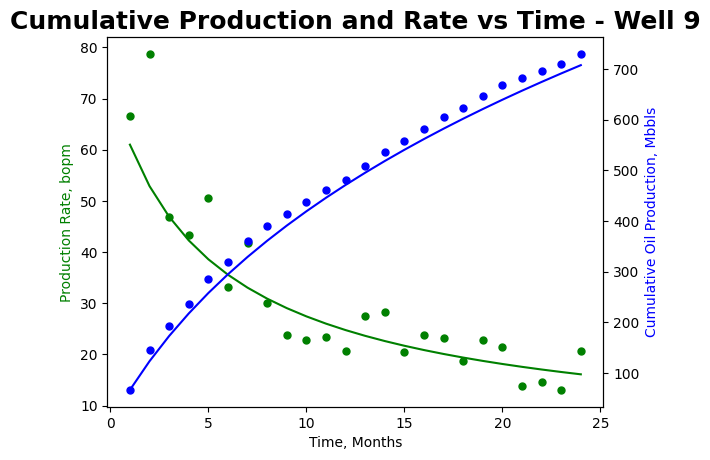

<Figure size 700x500 with 0 Axes>

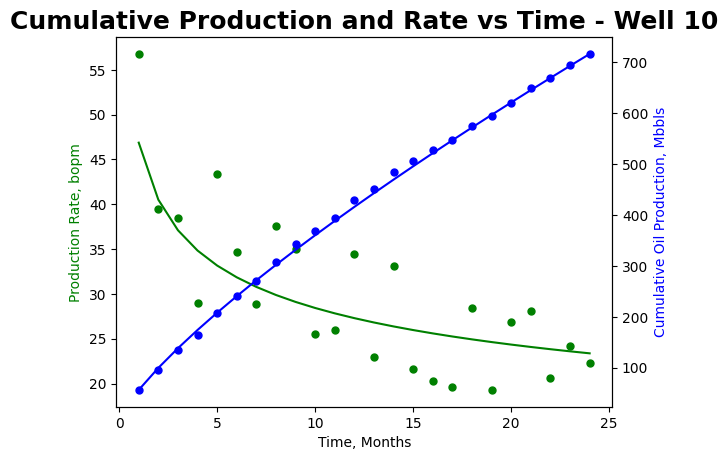

<Figure size 700x500 with 0 Axes>

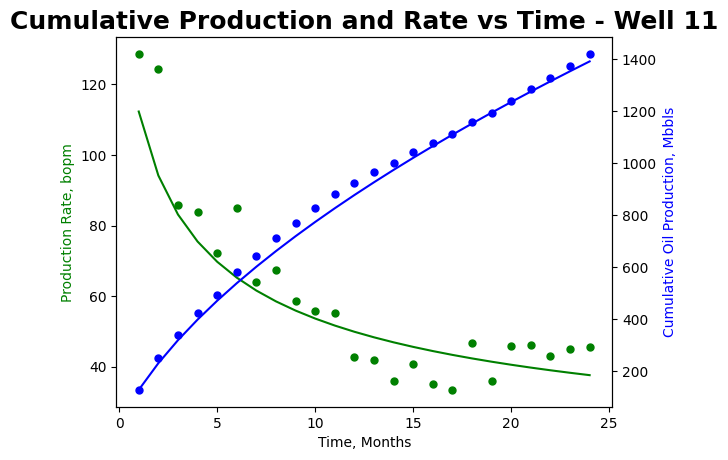

<Figure size 700x500 with 0 Axes>

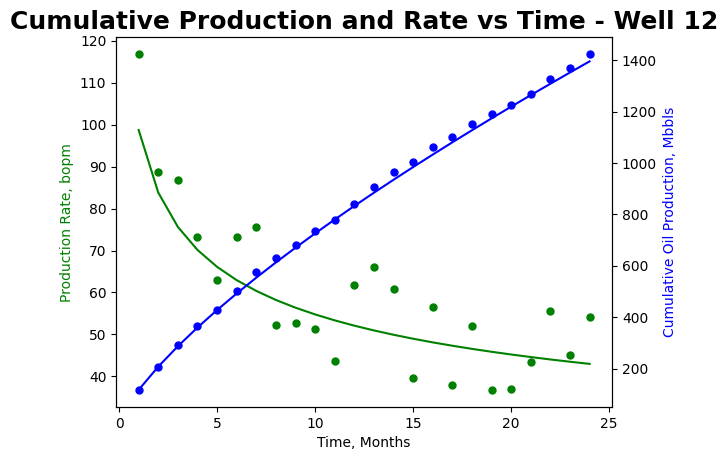

<Figure size 700x500 with 0 Axes>

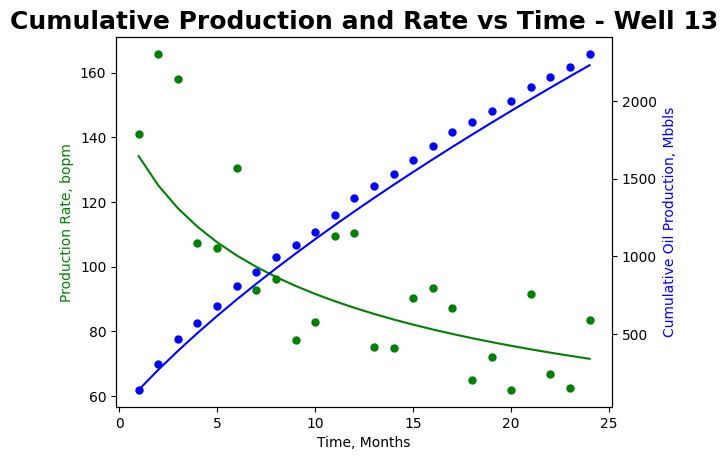

<Figure size 700x500 with 0 Axes>

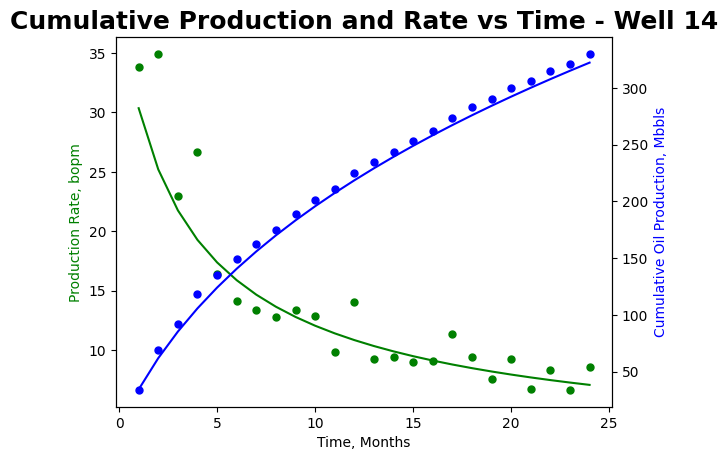

<Figure size 700x500 with 0 Axes>

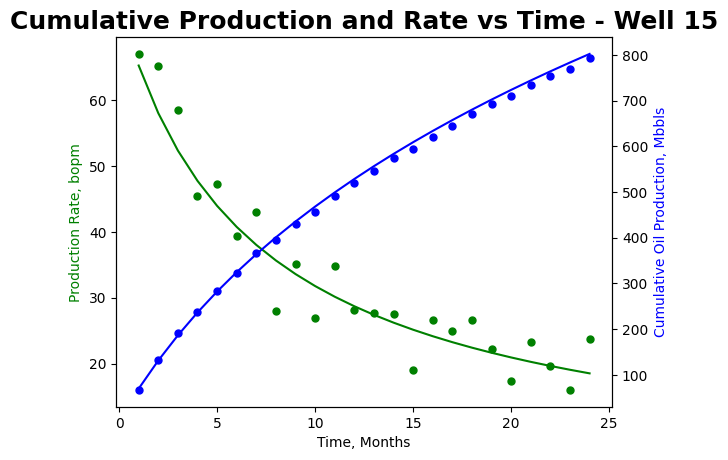

<Figure size 700x500 with 0 Axes>

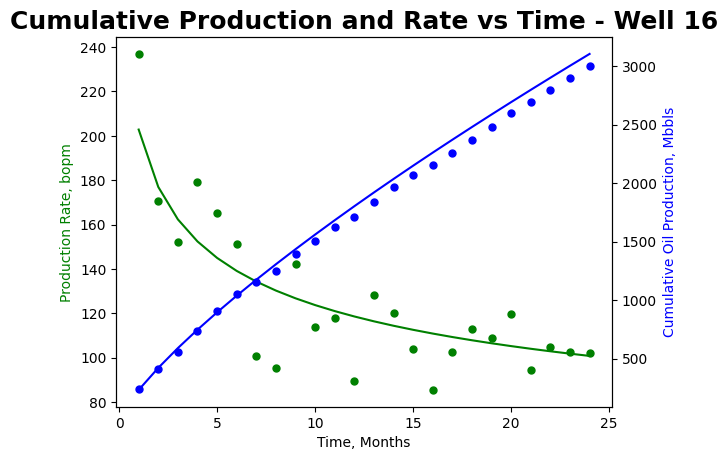

<Figure size 700x500 with 0 Axes>

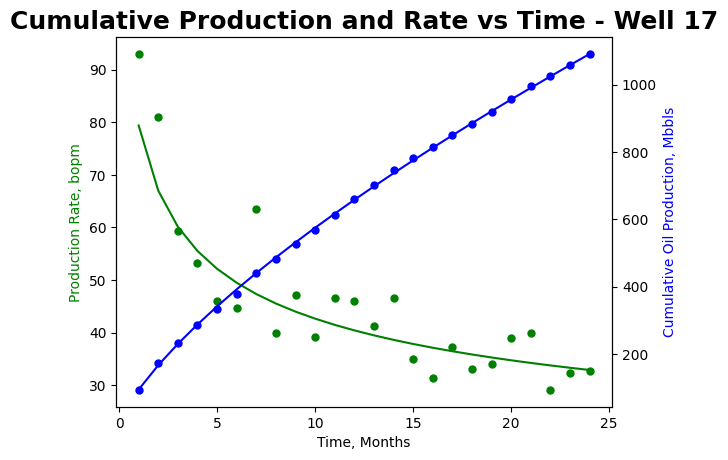

<Figure size 700x500 with 0 Axes>

In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path2file = '/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/'
dca_filepath = path2file + 'DCAparams.json'
prodData_filepath = path2file + 'ProdData.json'

with open(dca_filepath, 'r') as f:
  dcaParams_dict = json.load(f)

dcaParamsDF = pd.DataFrame(dcaParams_dict)
dcaParamsDF = dcaParamsDF.sort_values('well ID').reset_index(drop=True)
dcaParamsDF.head()

with open(prodData_filepath, 'r') as f:
  prodData_dict = json.load(f)

prodDataDF = pd.DataFrame(prodData_dict)
prodDataDF = prodDataDF.sort_values(['well ID', 'month']).reset_index(drop=True)
prodDataDF.head(26)


# get qi, Di and b of each well
wellID = 1
for wellID in range(1,18):
  dcaParamsDF_well_i = dcaParamsDF[dcaParamsDF['well ID'] == wellID].copy()
  dcaParamsDF_well_i

  qi = dcaParamsDF_well_i['Qi'].iloc[0]   # qi = dcaParamsDF_well_i.iloc[0, 0]
  Di = dcaParamsDF_well_i['di'].iloc[0]   # Di = dcaParamsDF_well_i.iloc[0, 1]
  b  = dcaParamsDF_well_i['b'].iloc[0]     # b  = dcaParamsDF_well_i.iloc[0, 2]

  # get actual well production data of the  well
  prodDataDF_well_i = prodDataDF[prodDataDF['well ID'] == wellID].copy()
  prodDataDF_well_i

  # calculate well flow rate and cumulative production
  dfLength = 24   # this is the number of rows in the production data
  t = np.arange(1,dfLength+1)
  Di = Di/12   # convert Di from %/year to %/month
  if b>0:
      # Hyperbolic decline model
      q = 30.4375*qi/((1 + b*Di*t)**(1/b)) #30.4375 = 365.125/12. This is to get rates in bbls/month
      Np = 30.4375*(qi/(Di*(1-b)))*(1-(1/(1+(b*Di*t))**((1-b)/b))) # Also scale Np bcos t is in months
  else:
      # Exponential decline model
      q = qi*np.exp(-Di*t)    # Not scaled yet so that it doesn't mess up our estimation of Np
      Np = 30.4375*(qi-q)/Di
      q = 30.4375*q           # Now scale q so it becomes in units of bbls/month

  # Store the model estimates of rate and cumulative production in the "ratesDF" dataframe
  prodDataDF_well_i['rate_model'] = q
  prodDataDF_well_i['cumulative_model'] = Np

  titleFontSize = 18
  axisLabelFontSize = 15
  axisNumFontSize = 13

  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx()

  ax1.plot(prodDataDF_well_i['month'], prodDataDF_well_i['rate']/1000, color="green", ls='None', marker='o', markersize=5,label = 'rate')
  ax1.plot(prodDataDF_well_i['month'], prodDataDF_well_i['rate_model']/1000, color="green", ls='-',label = 'rate_model')

  ax2.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative']/1000, color="blue", ls='None', marker='o', markersize=5,label = 'cumulative')
  ax2.plot(prodDataDF_well_i['month'], prodDataDF_well_i['cumulative_model']/1000, color="blue", ls='-', label = 'cumulative_model')

  ax1.set_xlabel('Time, Months')
  ax1.set_ylabel('Production Rate, bopm', color='g')
  ax2.set_ylabel('Cumulative Oil Production, Mbbls', color='b')

  ax2.set_title('Cumulative Production and Rate vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
  currFig = plt.figure(figsize=(7,5), dpi=100)
  currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

## How to generate a `Stacked Plot`?

['Well1', 'Well2', 'Well3', 'Well4']


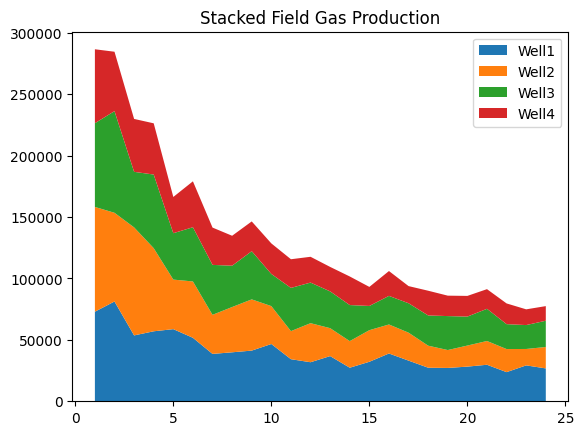

In [6]:
gasWells = [1, 2, 3, 4] # TO BE UPDATED! This is for demonstration only
gasRatesDF = pd.DataFrame(prodDataDF_well_i['month']) #converts prodDataDF_well_i['month'], which is a series to a DataFrame
gasRatesDF = gasRatesDF.reset_index(drop=True) # gasRatesDF only contains time

# In a loop, add the rates for each gas well as a column to gasRatesDF
for i in gasWells:
   currWellDF = prodDataDF[prodDataDF["well ID"]==i].copy()
   gasRatesDF['Well' + str(i)] = currWellDF["rate"].values    #remember that .values converts the DF to an array.

production = gasRatesDF.iloc[:,1:].values #remember that .values converts the DF to an array.

time = gasRatesDF['month'].values        #converts months 1, 2, ..24 from series to an np array
#print(np.shape(time))

labels = gasRatesDF.columns    #saves column headers as labels for the legend
labels = list(labels[1:])
print(labels)

# code to generate stacked plot
fig, ax = plt.subplots()
ax.stackplot(time, np.transpose(production),labels=labels)
ax.legend(loc='upper right')
plt.title('Stacked Field Gas Production')
plt.show()

2.     For questions 2 through 5, wells 1, 3, 4, 7, 8, 9, 13, and 17 are gas wells, whereas the others are oil wells. Write a Python code to create a stacked plot of the historical field gas production rate. Each gas well’s contribution should be shown in the stacked plot.

['Well1', 'Well3', 'Well4', 'Well7', 'Well8', 'Well9', 'Well13', 'Well17']


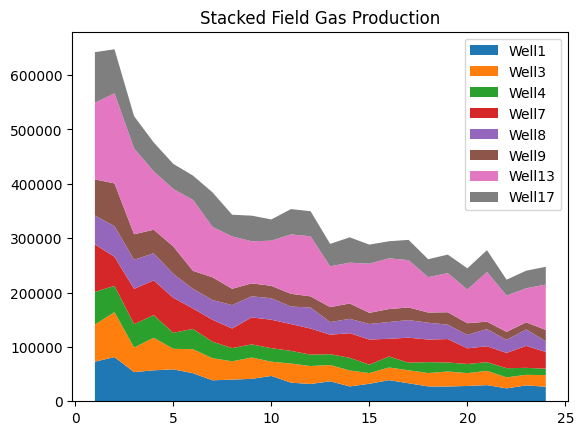

In [7]:
[1, 3, 4, 7, 8, 9, 13,17]
gasWells = [1, 3, 4, 7, 8, 9, 13,17] # TO BE UPDATED! This is for demonstration only
gasRatesDF = pd.DataFrame(prodDataDF_well_i['month']) #converts prodDataDF_well_i['month'], which is a series to a DataFrame
gasRatesDF = gasRatesDF.reset_index(drop=True) # gasRatesDF only contains time

# In a loop, add the rates for each gas well as a column to gasRatesDF
for i in gasWells:
   currWellDF = prodDataDF[prodDataDF["well ID"]==i].copy()
   gasRatesDF['Well' + str(i)] = currWellDF["rate"].values    #remember that .values converts the DF to an array.

production = gasRatesDF.iloc[:,1:].values #remember that .values converts the DF to an array.

time = gasRatesDF['month'].values        #converts months 1, 2, ..24 from series to an np array
#print(np.shape(time))

labels = gasRatesDF.columns    #saves column headers as labels for the legend
labels = list(labels[1:])
print(labels)

# code to generate stacked plot
fig, ax = plt.subplots()
ax.stackplot(time, np.transpose(production),labels=labels)
ax.legend(loc='upper right')
plt.title('Stacked Field Gas Production')
plt.show()

3.     Write a Python code to create a stacked plot of the historical field oil production rate. Each oil well’s contribution should be shown in the stacked plot.

['Well2', 'Well5', 'Well6', 'Well10', 'Well11', 'Well12', 'Well14', 'Well15', 'Well16']


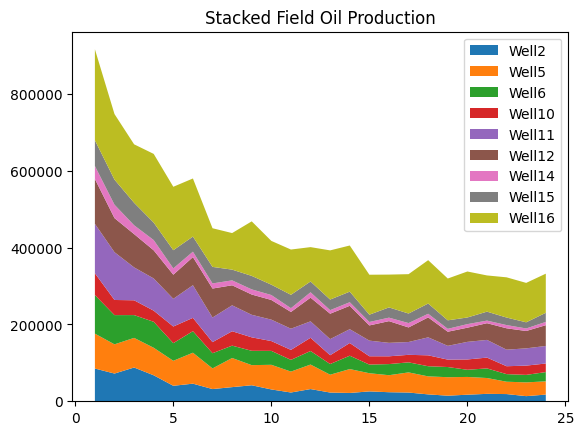

In [8]:
[1, 3, 4, 7, 8, 9, 13,17]
gas_wells = [1, 3, 4, 7, 8, 9, 13,17] # TO BE UPDATED! This is for demonstration only
oil_rates_df = pd.DataFrame(prodDataDF_well_i['month']) #converts prodDataDF_well_i['month'], which is a series to a DataFrame
oil_rates_df = oil_rates_df.reset_index(drop=True) # oil_rates_df only contains time

# In a loop, add the rates for each gas well as a column to oil_rates_df
for i in range(1,18):
  if i not in gas_wells:
   currWellDF = prodDataDF[prodDataDF["well ID"]==i].copy()
   oil_rates_df['Well' + str(i)] = currWellDF["rate"].values    #remember that .values converts the DF to an array.

production = oil_rates_df.iloc[:,1:].values #remember that .values converts the DF to an array.

time = oil_rates_df['month'].values        #converts months 1, 2, ..24 from series to an np array
#print(np.shape(time))

labels = oil_rates_df.columns    #saves column headers as labels for the legend
labels = list(labels[1:])
print(labels)

# code to generate stacked plot
fig, ax = plt.subplots()
ax.stackplot(time, np.transpose(production),labels=labels)
ax.legend(loc='upper right')
plt.title('Stacked Field Oil Production')
plt.show()

## How to create a `Stacked bar graph`?

**See the solution to question 4 provided**

4.     Write a Python code to create a stacked bar plot of historical field cumulative gas production for the first six months. Each gas well’s contribution should be shown in the stacked bar graph.

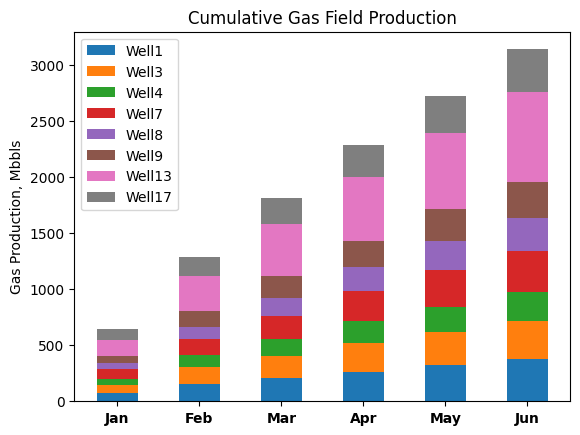

In [9]:
N = 6        # Number of months to plot
ind = np.arange(1,N+1)
months = ['Jan','Feb','Mar','Apr','May','Jun'] # Months to plot
result = np.zeros(len(months))
labels=[]
loc_plts = []
width = 0.5

cumGasDF = pd.DataFrame(prodDataDF_well_i['month'])
for i in gasWells:
    currWellDF = prodDataDF[prodDataDF["well ID"]==i].copy()
    cumGasDF['Well' + str(i)] = currWellDF["cumulative"].values

j = 1
for counter in range(len(gasWells)):
   i = gasWells[counter] #gets the well number for each gas well
   p1 = plt.bar(cumGasDF['month'][0:N], cumGasDF['Well' + str(i)][0:N]/1000,
                width, bottom = result)
   labels.append('Well' + str(i))
   loc_plts.append(p1)
   plt.ylabel('Gas Production, Mbbls')
   plt.title('Cumulative Gas Field Production')
   plt.xticks(ind, months, fontweight='bold')
   j += 1
   split = cumGasDF.iloc[0:6,1:j].values
   result = np.sum(a=split,axis=1)/1000

plt.legend(loc_plts,labels)
plt.show()


5.     Write a Python code to create a stacked bar plot of historical field cumulative oil production for the first six months. Each oil well’s contribution should be shown in the stacked bar graph.

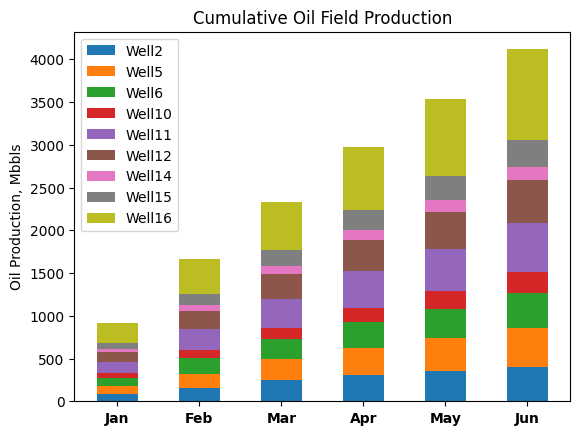

In [10]:
N = 6        # Number of months to plot
ind = np.arange(1,N+1)
months = ['Jan','Feb','Mar','Apr','May','Jun'] # Months to plot
result = np.zeros(len(months))
labels=[]
loc_plts = []
width = 0.5

cumOilDF = pd.DataFrame(prodDataDF_well_i['month'])
oilWells=[]
for i in range(1,18):
  if i not in gasWells:
    currWellDF = prodDataDF[prodDataDF["well ID"]==i].copy()
    cumOilDF['Well' + str(i)] = currWellDF["cumulative"].values
    oilWells.append(i)

j = 1
for counter in range(len(oilWells)):
   i = oilWells[counter] #gets the well number for each gas well
   p1 = plt.bar(cumOilDF['month'][0:N], cumOilDF['Well' + str(i)][0:N]/1000,
                width, bottom = result)
   labels.append('Well' + str(i))
   loc_plts.append(p1)
   plt.ylabel('Oil Production, Mbbls')
   plt.title('Cumulative Oil Field Production')
   plt.xticks(ind, months, fontweight='bold')
   j += 1
   split = cumOilDF.iloc[0:6,1:j].values
   result = np.sum(a=split,axis=1)/1000

plt.legend(loc_plts,labels)
plt.show()


6.     Load the well log data for wells 15_9-F-4, 15_9-F-1B, and 15_9-F-14. Plot the following well logs against depth for each of the three wells, using a well log track for each variable:

  (a)     bulk density (rhob) log

  (b)     DT (interval transit time for P-wave or inverse of primary wave velocity) log

  (c)     DTS (interval transit time for S-wave or inverse of shear wave velocity) log

  (d)     GR (Gamma Ray) log

  (e)     NPHI (neutron porosity) log
  

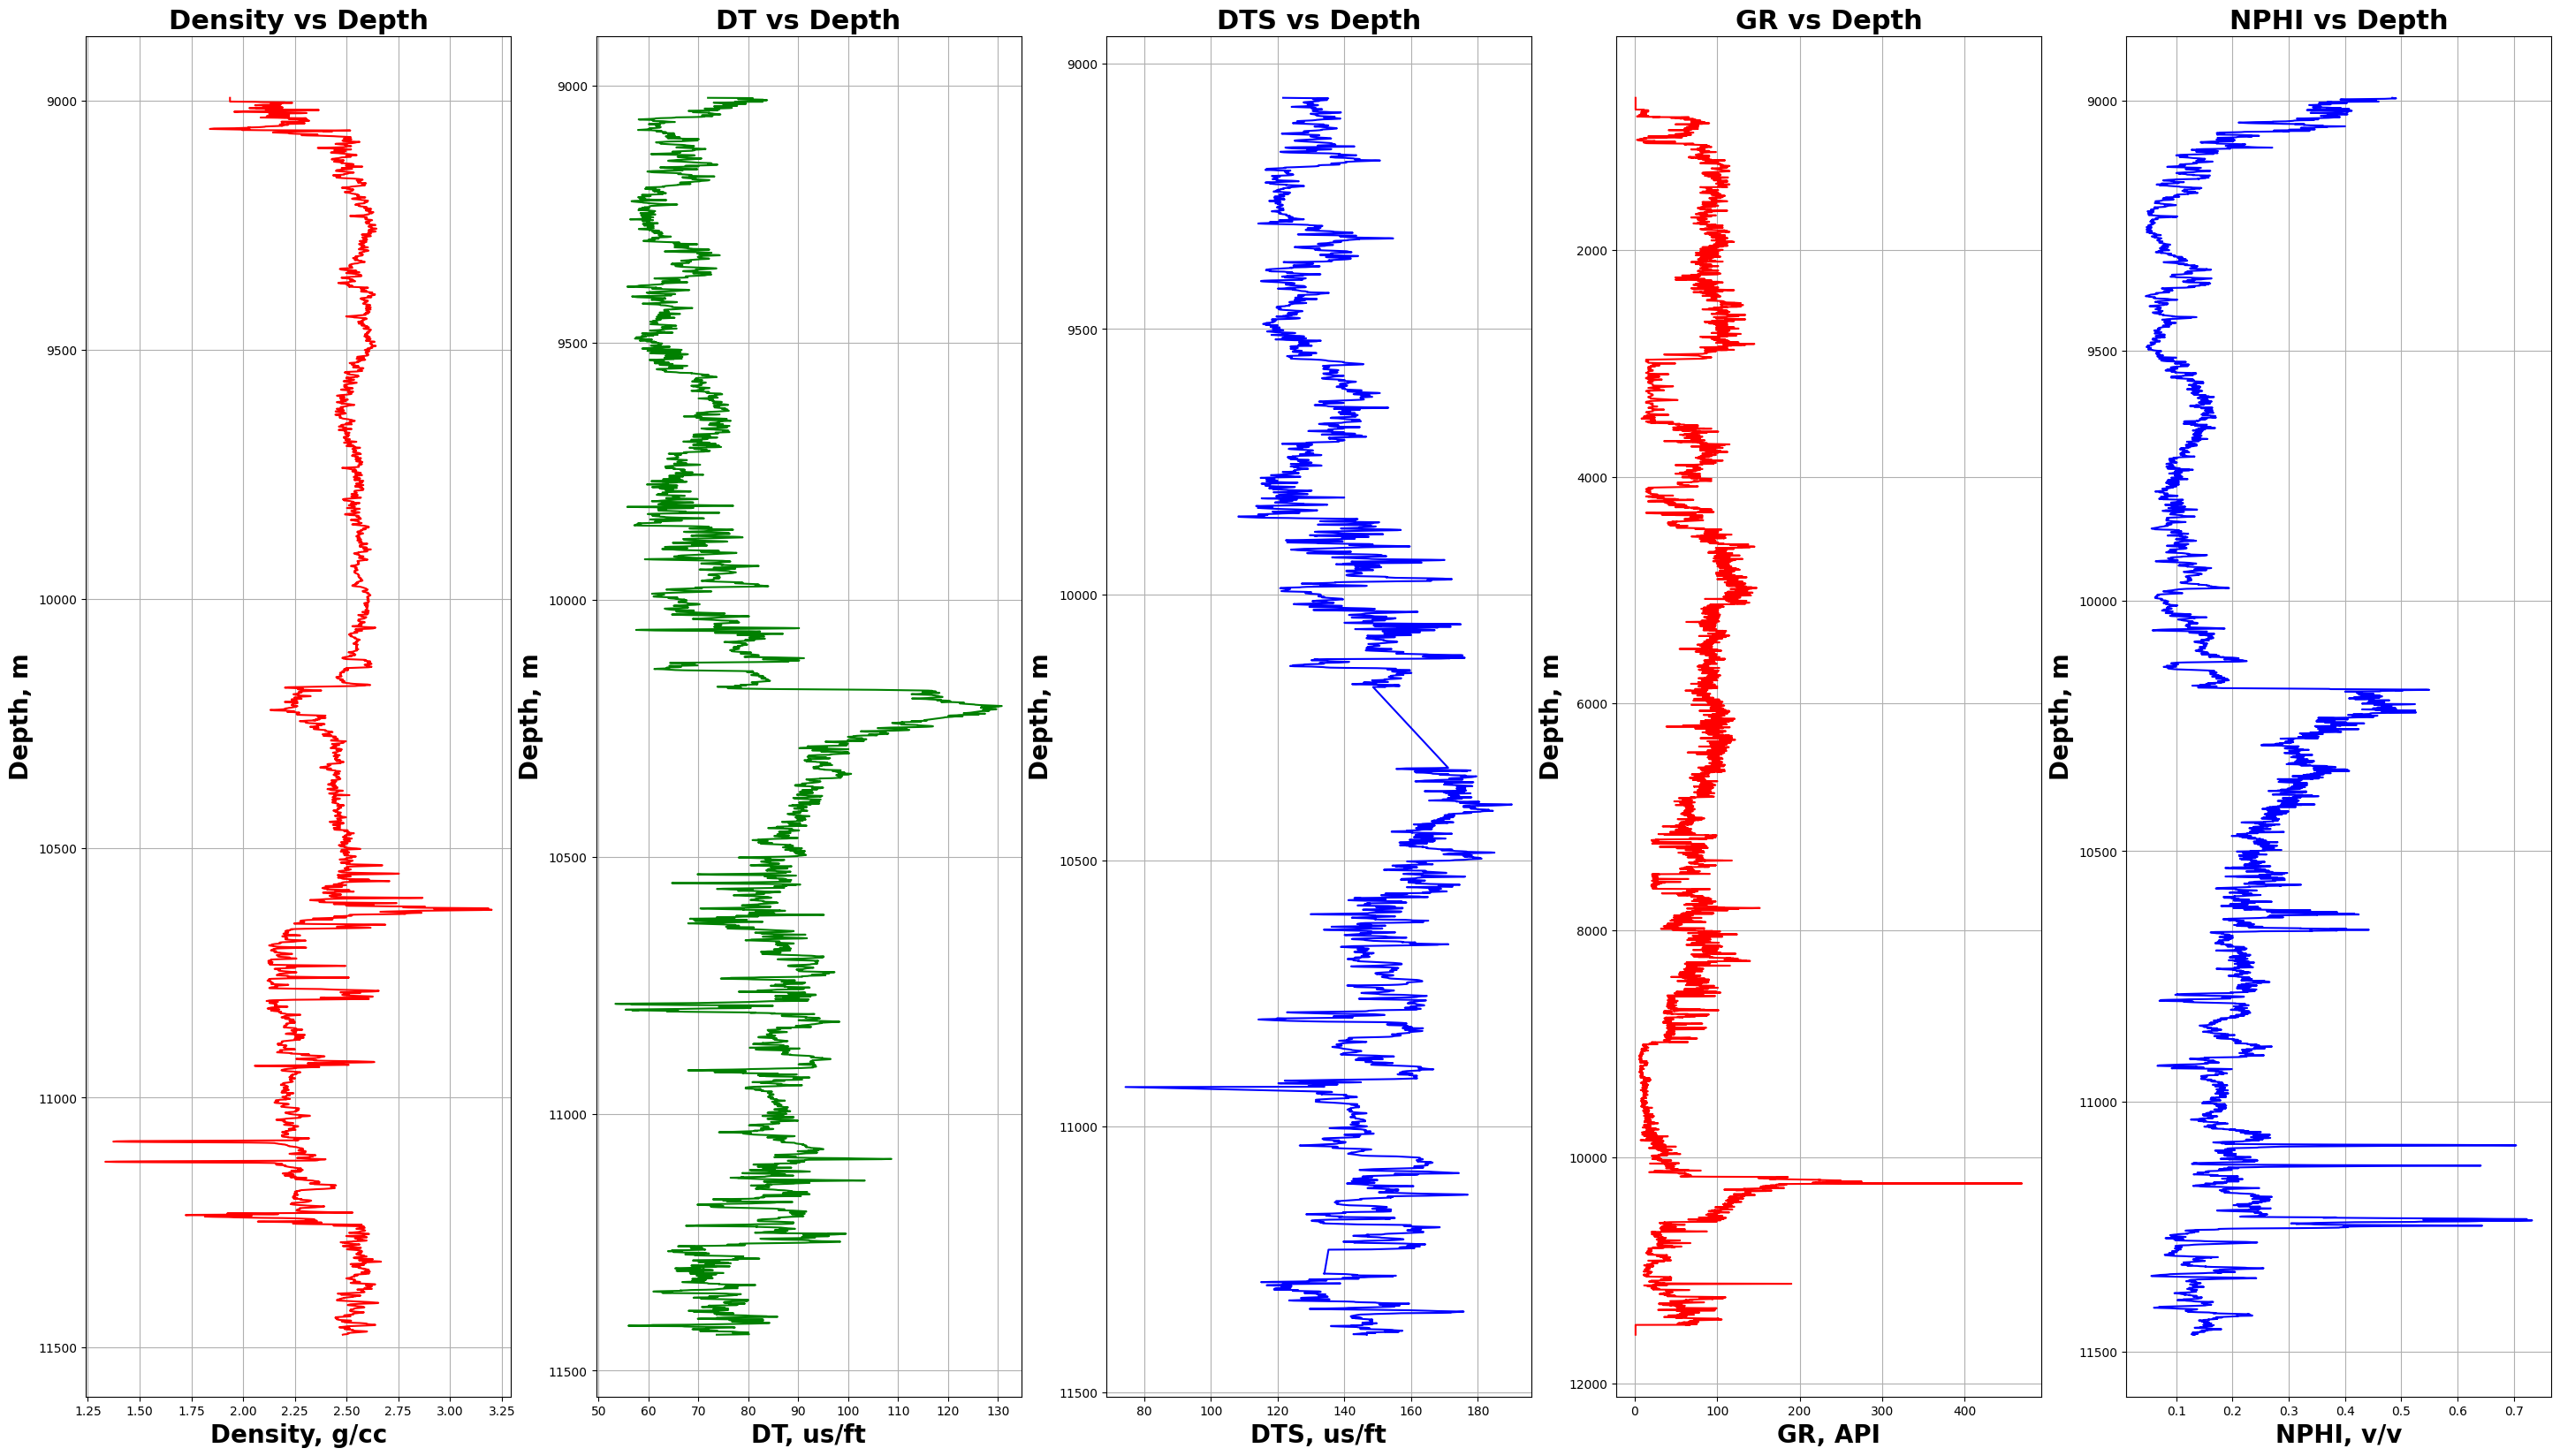

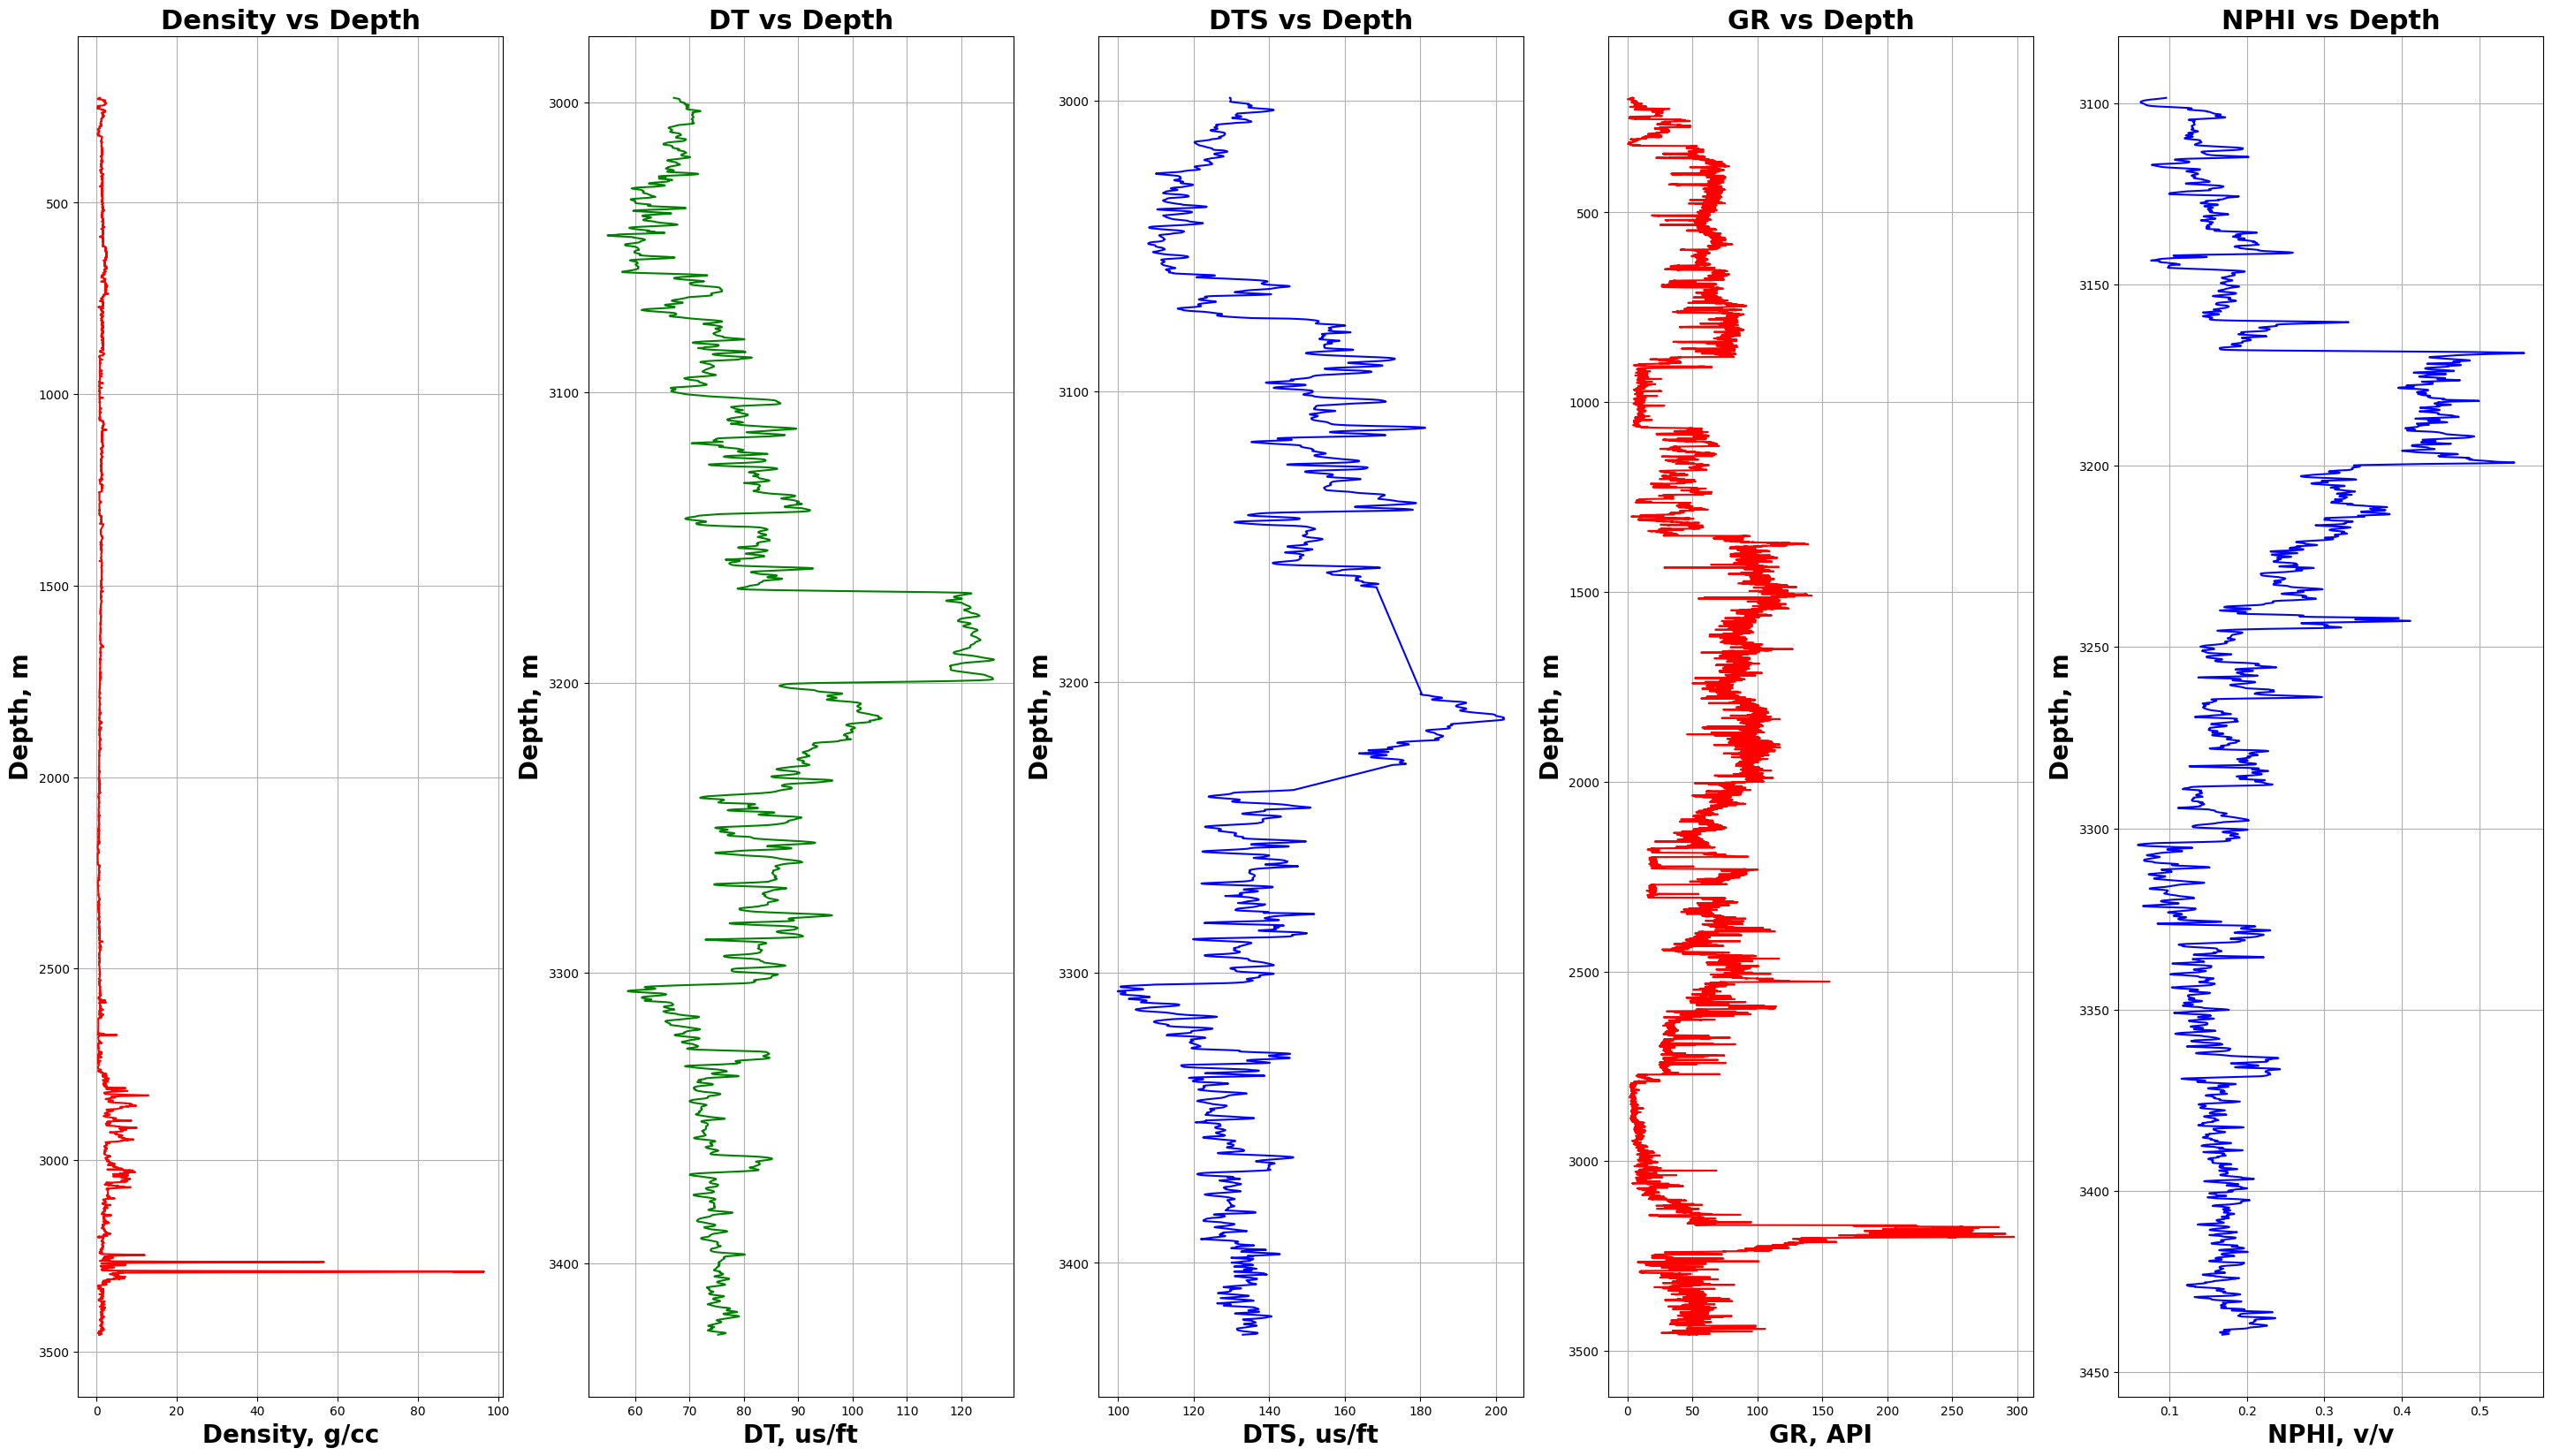

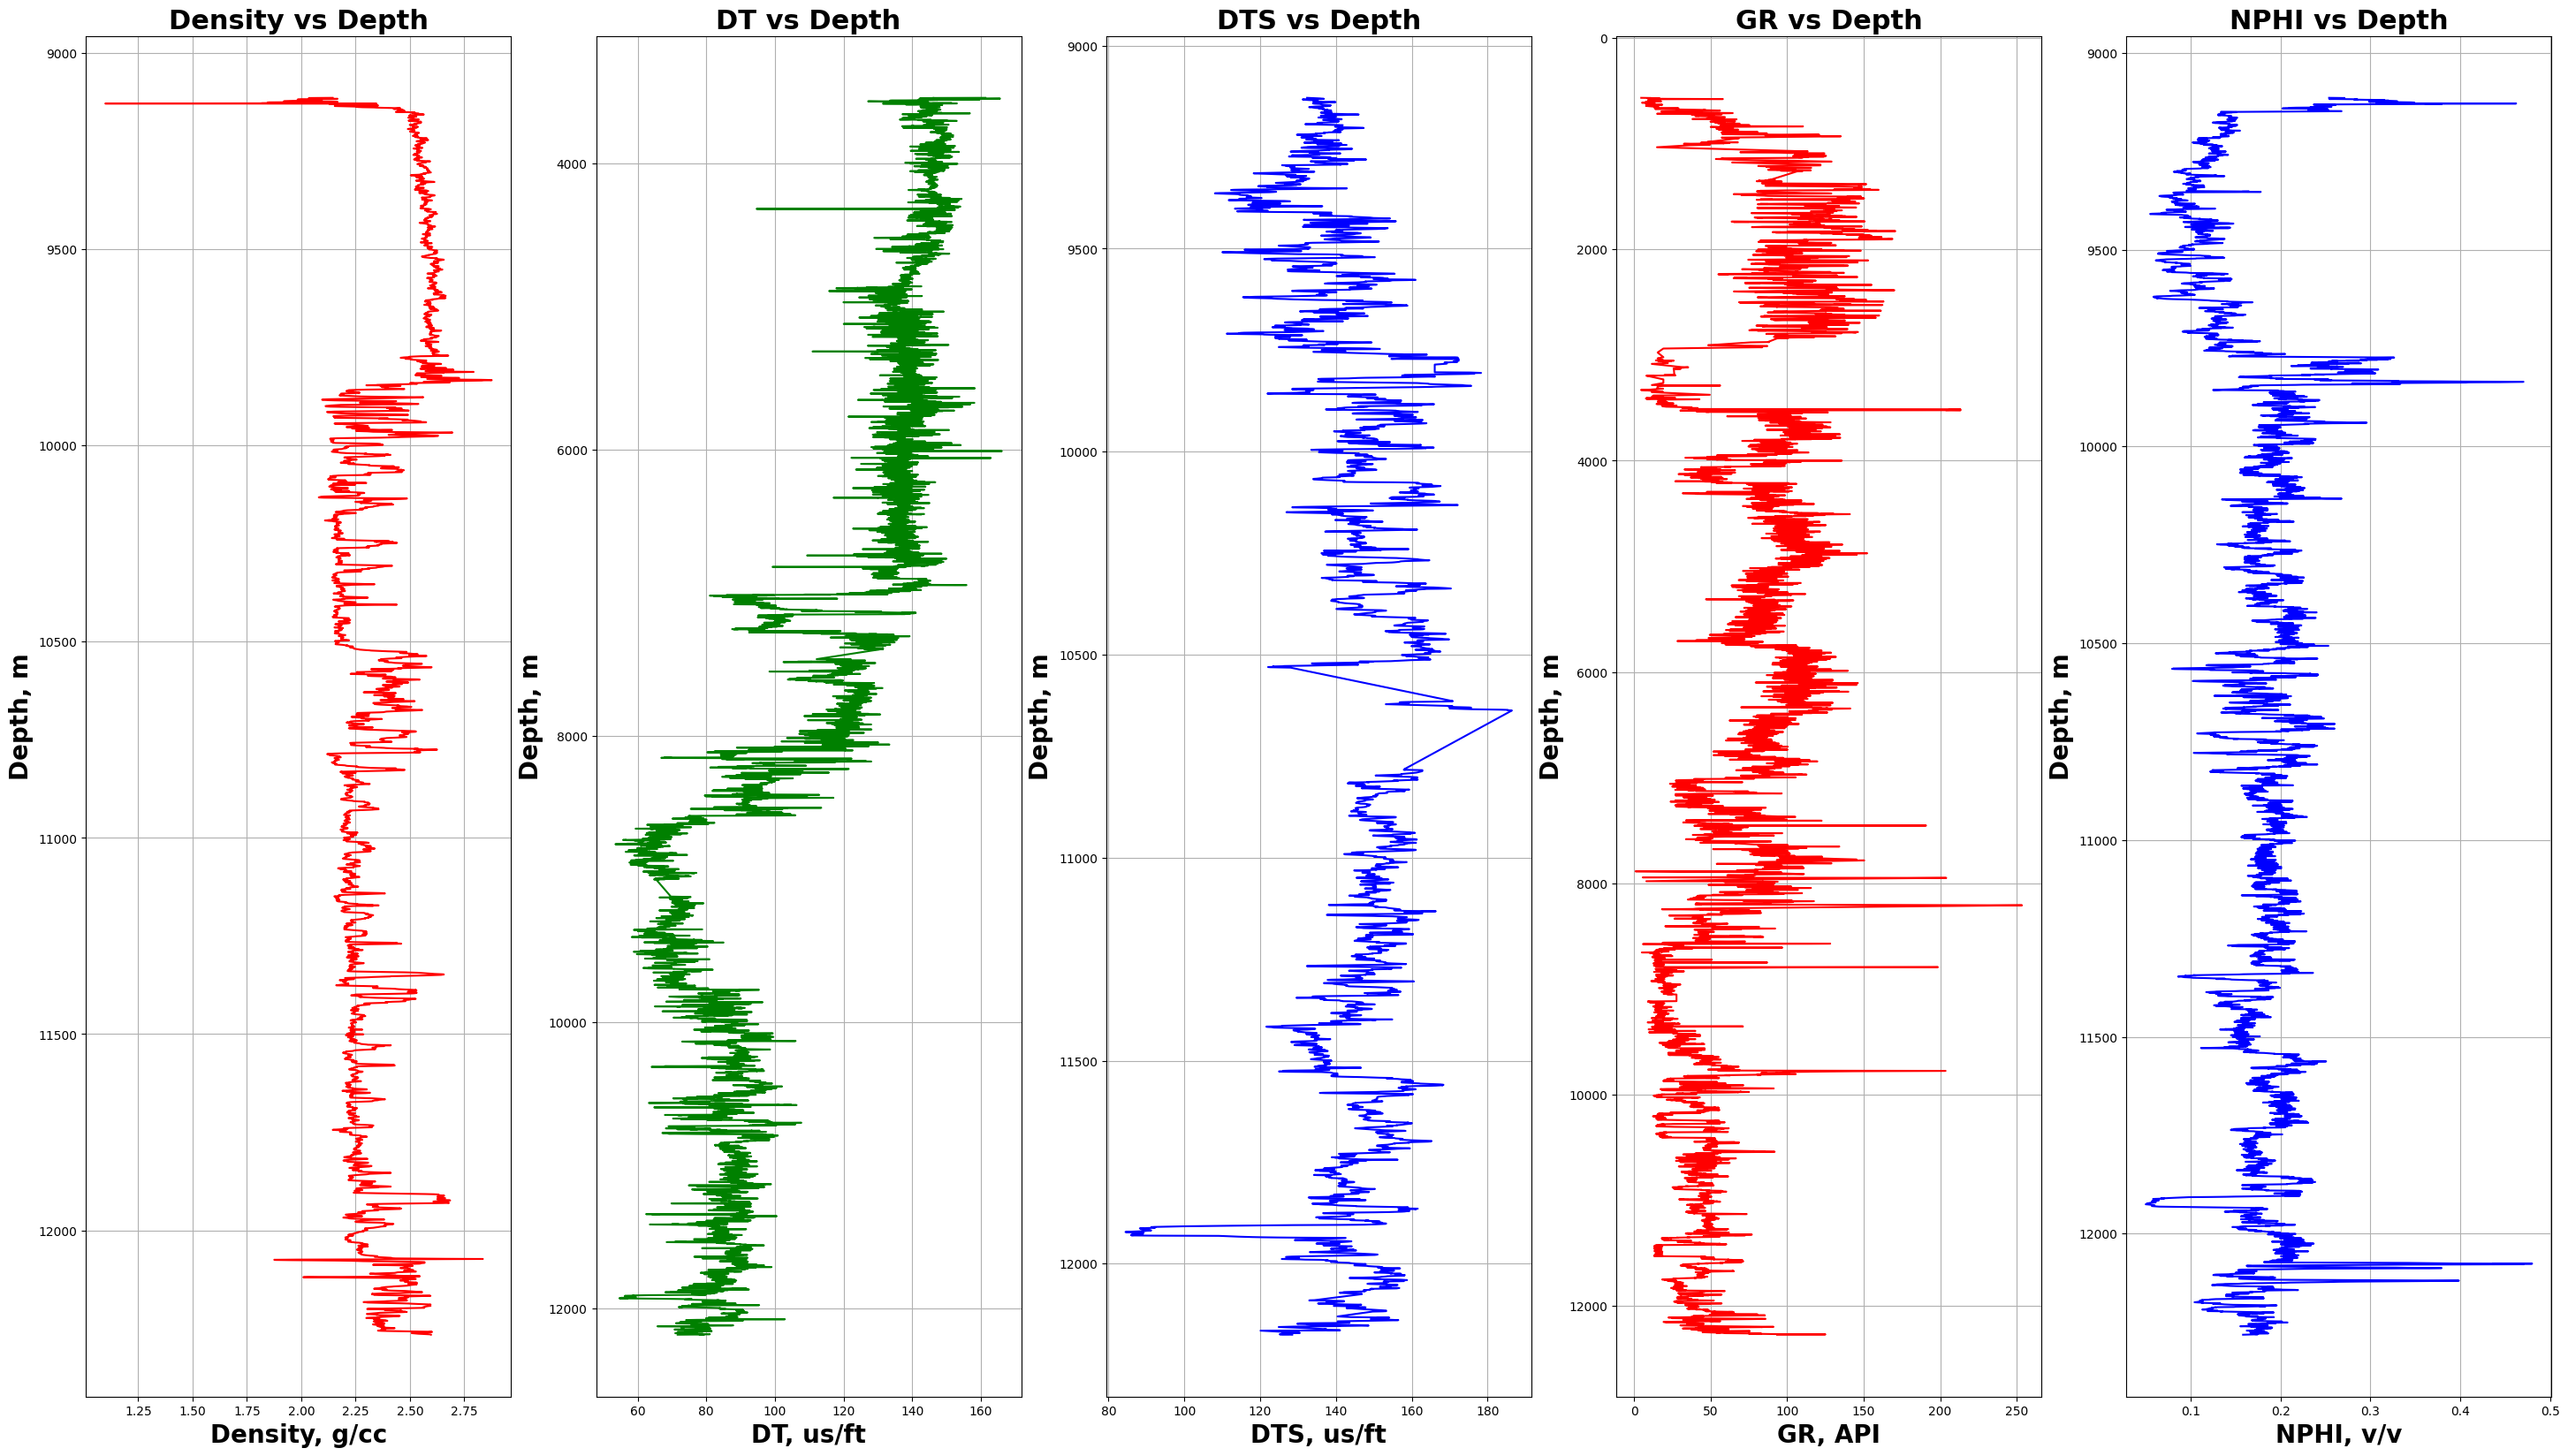

In [11]:
#well 15_9-F-4
data1 = np.loadtxt("/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/volve_logs/15_9-F-4_INPUT.las",skiprows=69)
DZ1,rho1=data1[:,0], data1[:,7]
DZ1=DZ1[np.where(rho1>0)]
rho1=rho1[np.where(rho1>0)]


titleFontSize = 22
fontSize = 20
#Plotting multiple well log tracks on one graph
fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 5, 1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='red')
plt.title('Density vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DT1 =data1[:,0], data1[:,2]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1, 5, 2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='green')
plt.title('DT vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DTS1 =data1[:,0], data1[:,3]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1, 5, 3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='blue')
plt.title('DTS vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,GR1 =data1[:,0], data1[:,4]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1, 5, 4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='red')
plt.title('GR vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,NPHI1 =data1[:,0], data1[:,5]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1, 5, 5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='blue')
plt.title('NPHI vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

#well 15_9-F-1B
data1 = np.loadtxt("/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/volve_logs/15_9-F-1B_INPUT.LAS",skiprows=69)
DZ1,rho1=data1[:,0], data1[:,16]
DZ1=DZ1[np.where(rho1>0)]
rho1=rho1[np.where(rho1>0)]


titleFontSize = 22
fontSize = 20
#Plotting multiple well log tracks on one graph
fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 5, 1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='red')
plt.title('Density vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DT1 =data1[:,0], data1[:,8]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1, 5, 2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='green')
plt.title('DT vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DTS1 =data1[:,0], data1[:,9]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1, 5, 3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='blue')
plt.title('DTS vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,GR1 =data1[:,0], data1[:,10]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1, 5, 4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='red')
plt.title('GR vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,NPHI1 =data1[:,0], data1[:,12]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1, 5, 5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='blue')
plt.title('NPHI vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

#well 15_9-F-14
data1 = np.loadtxt("/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/volve_logs/15_9-F-14_INPUT.las",skiprows=69)
DZ1,rho1=data1[:,0], data1[:,9]
DZ1=DZ1[np.where(rho1>0)]
rho1=rho1[np.where(rho1>0)]


titleFontSize = 22
fontSize = 20
#Plotting multiple well log tracks on one graph
fig = plt.figure(figsize=(36,20),dpi=100)
fig.tight_layout(pad=1, w_pad=4, h_pad=2)

plt.subplot(1, 5, 1)
plt.grid(axis='both')
plt.plot(rho1,DZ1, color='red')
plt.title('Density vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('Density, g/cc', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DT1 =data1[:,0], data1[:,3]
DZ1=DZ1[np.where(DT1>0)]
DT1=DT1[np.where(DT1>0)]

plt.subplot(1, 5, 2)
plt.grid(axis='both')
plt.plot(DT1,DZ1, color='green')
plt.title('DT vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DT, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,DTS1 =data1[:,0], data1[:,4]
DZ1=DZ1[np.where(DTS1>0)]
DTS1=DTS1[np.where(DTS1>0)]

plt.subplot(1, 5, 3)
plt.grid(axis='both')
plt.plot(DTS1,DZ1, color='blue')
plt.title('DTS vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('DTS, us/ft', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,GR1 =data1[:,0], data1[:,5]
DZ1=DZ1[np.where(GR1>0)]
GR1=GR1[np.where(GR1>0)]

plt.subplot(1, 5, 4)
plt.grid(axis='both')
plt.plot(GR1,DZ1, color='red')
plt.title('GR vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('GR, API', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

DZ1,NPHI1 =data1[:,0], data1[:,6]
DZ1=DZ1[np.where(NPHI1>0)]
NPHI1=NPHI1[np.where(NPHI1>0)]

plt.subplot(1, 5, 5)
plt.grid(axis='both')
plt.plot(NPHI1,DZ1, color='blue')
plt.title('NPHI vs Depth', fontsize=titleFontSize, fontweight='bold')
plt.xlabel('NPHI, v/v', fontsize = fontSize, fontweight='bold')
plt.ylabel('Depth, m', fontsize = fontSize, fontweight='bold')
plt.gca().invert_yaxis()

In [12]:
# Enter code for the other two wells here

7. (a) Write a Python code to load the Volve daily production data from the attached "VolveData.json" file.

  (b) Convert the loaded data into a Pandas DataFrame and visualize the Pandas DataFrame. Print out the column headers and observe that the column named "NPD_WELL_BORE_CODE" contains the wellbore codes; the column named "NPD_WELL_BORE_NAME" contains the well names; the columns named "AVG_DOWNHOLE_PRESSURE" and "AVG_DOWNHOLE_TEMPERATURE" contain the average bottomhole pressure and temperature, respectively; the column named "DP_CHOKE_SIZE" contains the choke sizes; the columns named "BORE_OIL_VOL", "BORE_GAS_VOL", and "BORE_WAT_VOL" contain the daily oil, gas and water production rates, respectively; the column named "BORE_WI_VOL" contains the daily water injection rates; while the column named "FLOW_KIND" tells you whether the well is a production well or an injection well.

  (c) Plot the choke size data on the secondary y-axis and oil rate on the primary y-axis for each of the wells in the Volve data.

  (d) Look at all the plots generated and observe that the oil rate is nearly zero for the injection wells. You can see which wells are injection wells from "FLOW_KIND" column of the DataFrame. Modify your solution to (c) above to plot the daily water injection rate instead of daily oil production rate for the injection wells. Use a different marker color for the injection rates so that it is clearly different from the production wells.

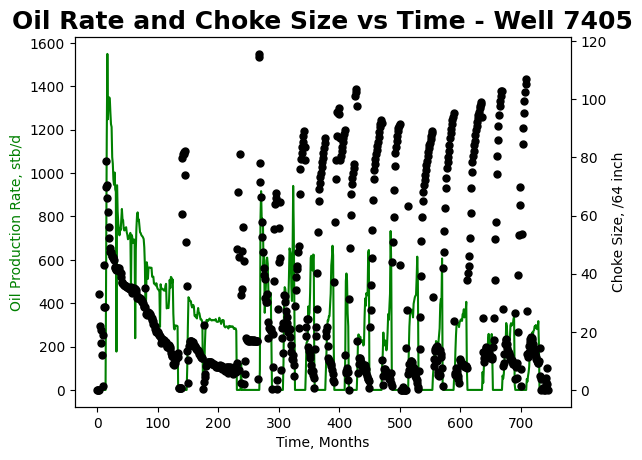

<Figure size 700x500 with 0 Axes>

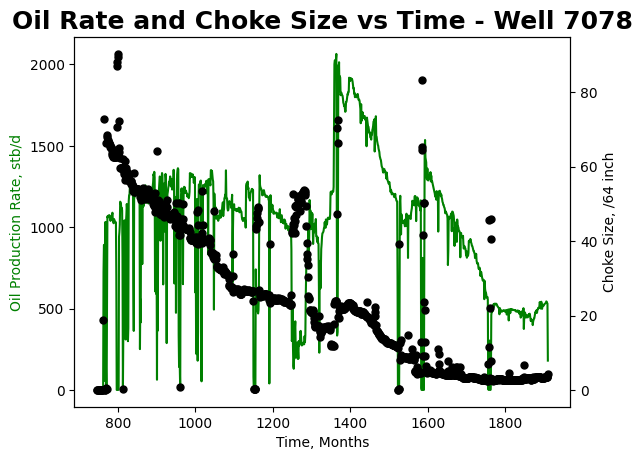

<Figure size 700x500 with 0 Axes>

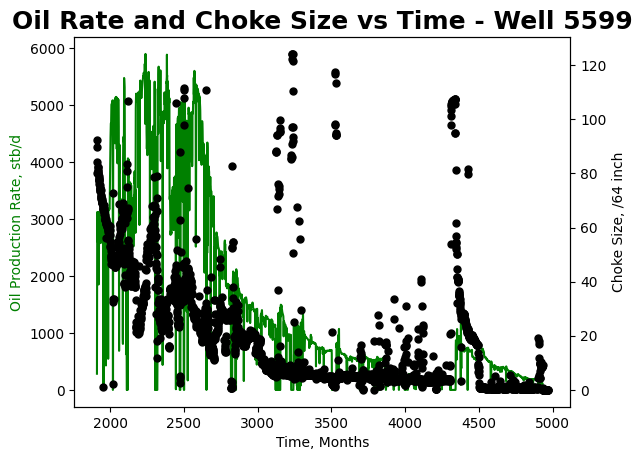

<Figure size 700x500 with 0 Axes>

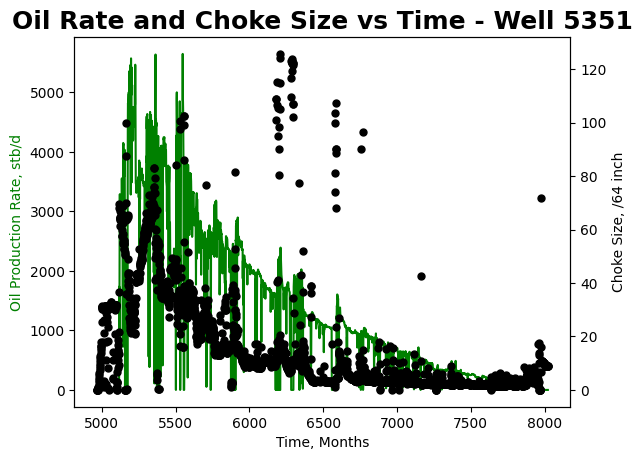

<Figure size 700x500 with 0 Axes>

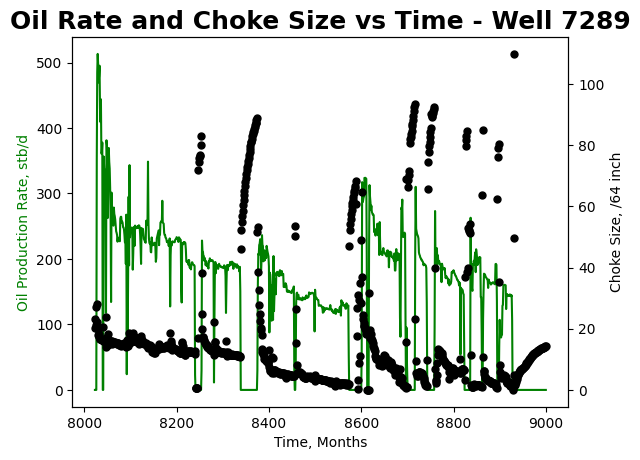

<Figure size 700x500 with 0 Axes>

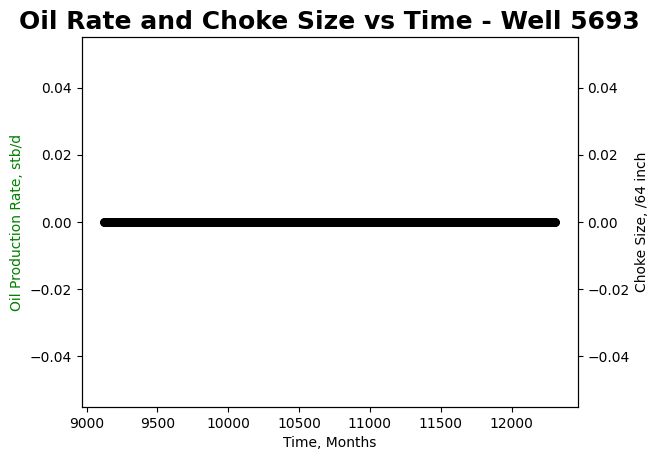

<Figure size 700x500 with 0 Axes>

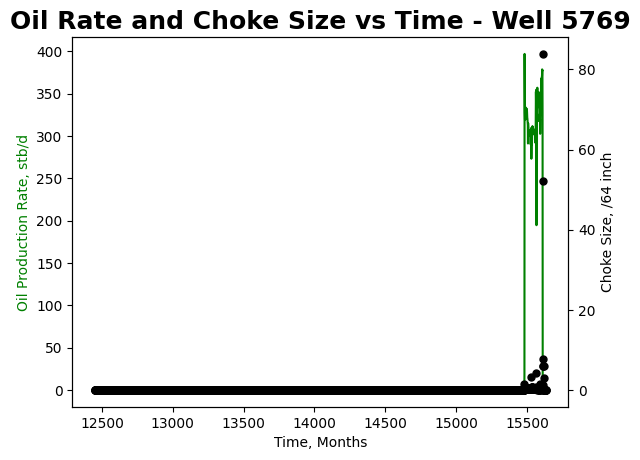

<Figure size 700x500 with 0 Axes>

In [13]:
#7a
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

volve_filepath = '/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/volve_data.json'

with open(volve_filepath, 'r') as f:
  volve_dict = json.load(f)
#7b
volveDF = pd.DataFrame(volve_dict)
volveDF.head()
volveDF.tail()


#7c
wellIDlist = volveDF['NPD_WELL_BORE_CODE'].unique()

for wellID in wellIDlist:

  # get actual well production data of the  well
  prodDataDF_well_i = volveDF[volveDF['NPD_WELL_BORE_CODE'] == wellID].copy()



  titleFontSize = 18
  axisLabelFontSize = 15
  axisNumFontSize = 13

  fig, ax1 = plt.subplots()

  ax2 = ax1.twinx()
  ax1.plot(prodDataDF_well_i['BORE_OIL_VOL'],  color="green", ls='-',label = 'oil_rate')
  ax2.plot(prodDataDF_well_i['DP_CHOKE_SIZE'], color="black", ls='None', marker='o', markersize=5,label = 'cumulative')


  ax1.set_xlabel('Time, Months')
  ax1.set_ylabel('Oil Production Rate, stb/d', color='g')
  ax2.set_ylabel('Choke Size, /64 inch', color='k')

  ax2.set_title('Oil Rate and Choke Size vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
  currFig = plt.figure(figsize=(7,5), dpi=100)
  #currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

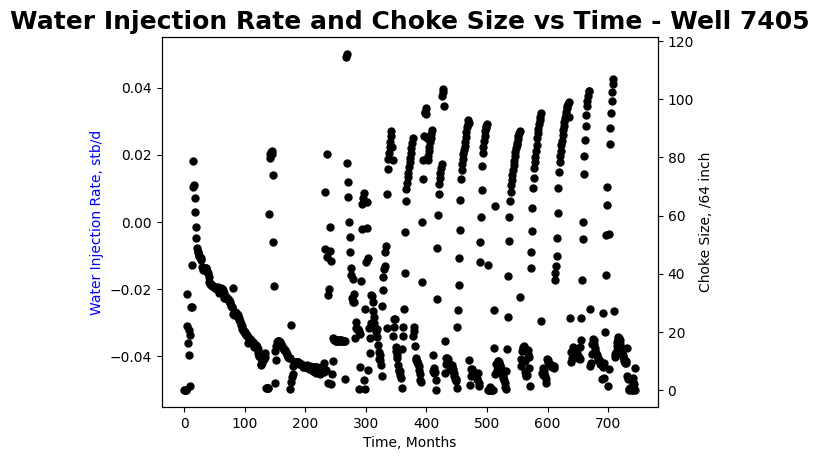

<Figure size 700x500 with 0 Axes>

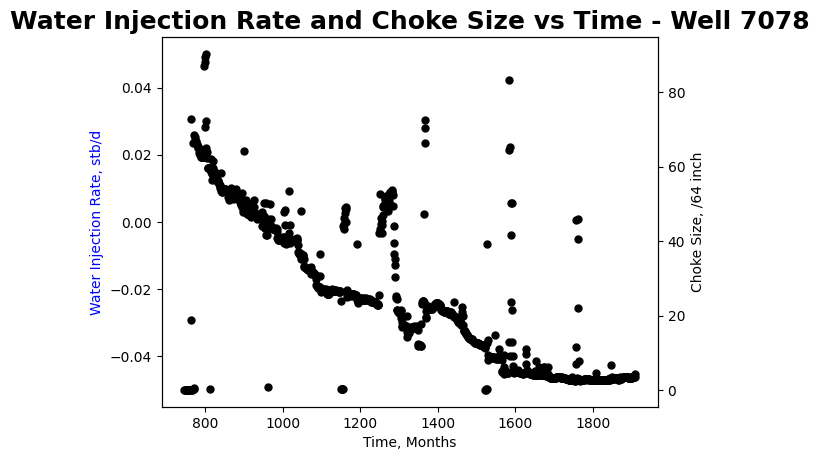

<Figure size 700x500 with 0 Axes>

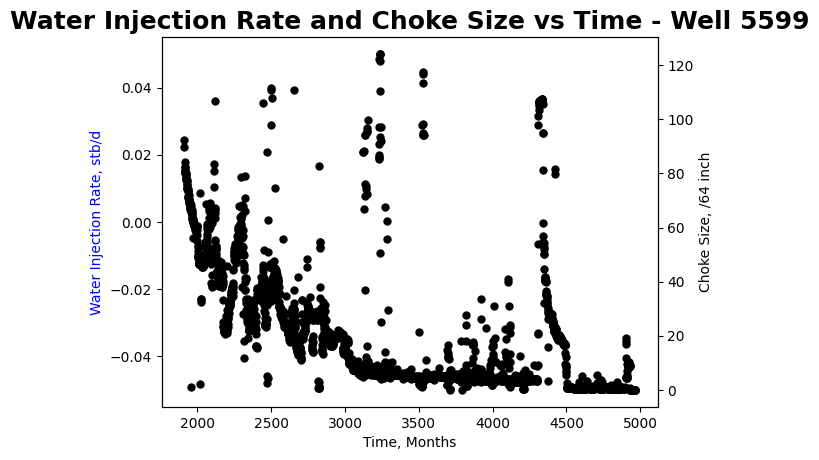

<Figure size 700x500 with 0 Axes>

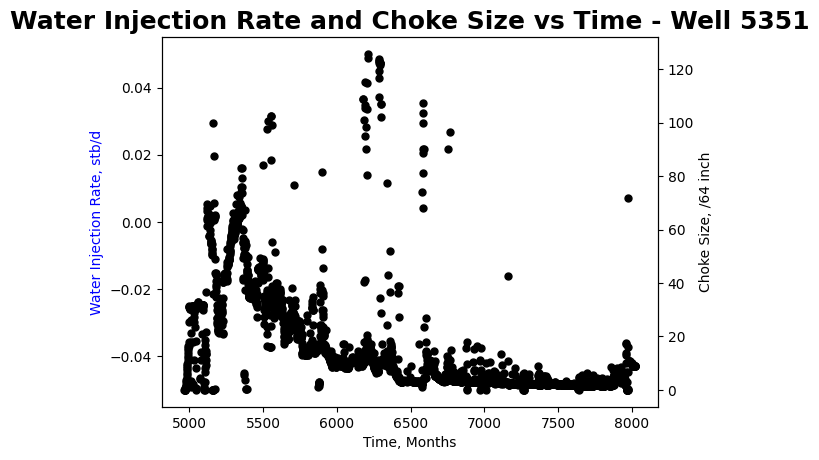

<Figure size 700x500 with 0 Axes>

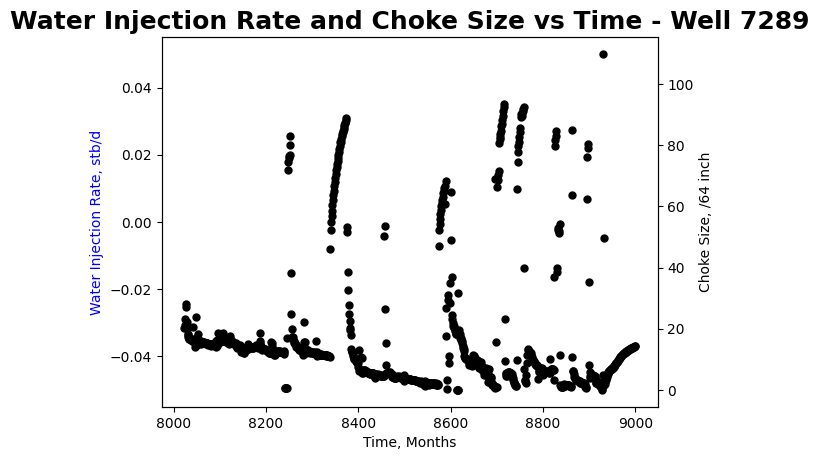

<Figure size 700x500 with 0 Axes>

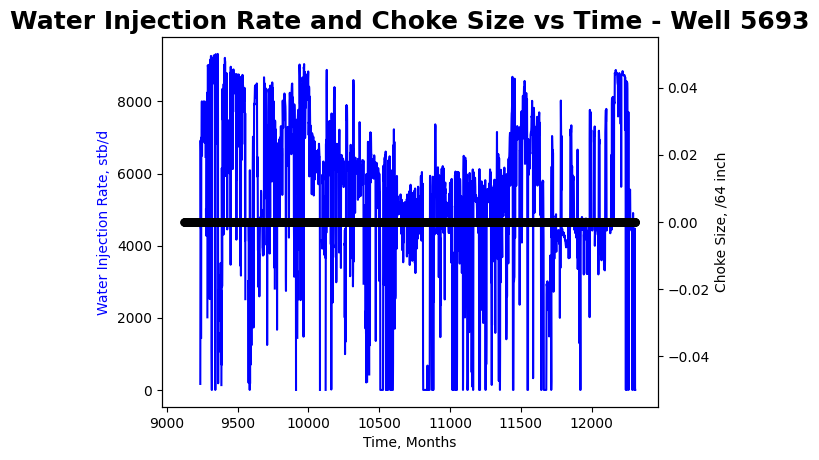

<Figure size 700x500 with 0 Axes>

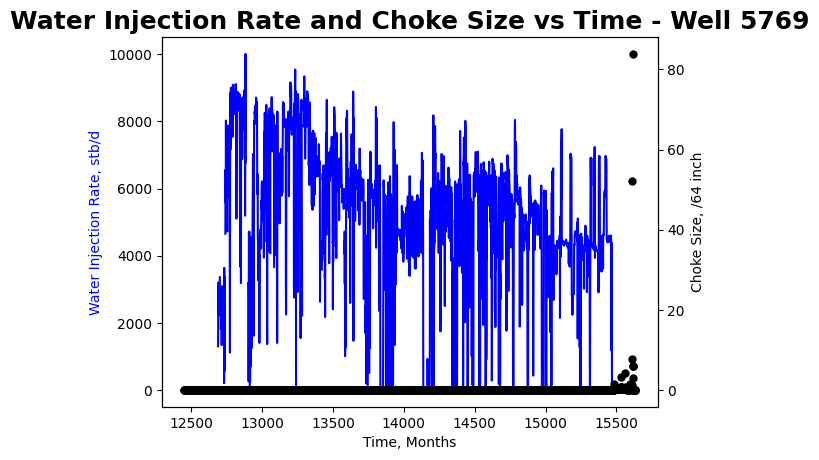

<Figure size 700x500 with 0 Axes>

In [14]:
#7a
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

volve_filepath = '/content/drive/MyDrive/ProjectFolder_2025_Zinedine_Asghar/volve_data.json'

with open(volve_filepath, 'r') as f:
  volve_dict = json.load(f)
#7b
volveDF = pd.DataFrame(volve_dict)
volveDF.head()
volveDF.tail()


#7d
wellIDlist = volveDF['NPD_WELL_BORE_CODE'].unique()


titleFontSize = 18
axisLabelFontSize = 15
axisNumFontSize = 13

for wellID in wellIDlist:

  # get actual well production data of the  well
  prodDataDF_well_i = volveDF[volveDF['NPD_WELL_BORE_CODE'] == wellID].copy()

  if prodDataDF_well_i['FLOW_KIND'].values[0] == 'Production':
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(prodDataDF_well_i['BORE_OIL_VOL'],  color="green", ls='-',label = 'oil_rate')
    ax2.plot(prodDataDF_well_i['DP_CHOKE_SIZE'], color="black", ls='None', marker='o', markersize=5,label = 'cumulative')


    ax1.set_xlabel('Time, Months')
    ax1.set_ylabel('Oil Production Rate, stb/d', color='g')
    ax2.set_ylabel('Choke Size, /64 inch', color='k')

    ax2.set_title('Oil Rate and Choke Size vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
    currFig = plt.figure(figsize=(7,5), dpi=100)
    #currFig.savefig('well'+str(wellID)+'_Gp.png', dpi=600)

  else:
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(prodDataDF_well_i['BORE_WI_VOL'],  color="blue", ls='-',label = 'water_inj_rate')
    ax2.plot(prodDataDF_well_i['DP_CHOKE_SIZE'], color="black", ls='None', marker='o', markersize=5,label = 'cumulative')


    ax1.set_xlabel('Time, Months')
    ax1.set_ylabel('Water Injection Rate, stb/d', color='b')
    ax2.set_ylabel('Choke Size, /64 inch', color='k')

    ax2.set_title('Water Injection Rate and Choke Size vs Time - Well ' + str(wellID), fontsize=titleFontSize, fontweight='bold')
    currFig = plt.figure(figsize=(7,5), dpi=100)